## Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


## Loading Data 

In [2]:
data = pd.read_csv('new_dataset.csv')

## Performing EDA on Selected Dataset

In [3]:
# Data Understanding 
data.shape

(1048575, 27)

In [4]:
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,Label,Attack,Dataset
0,192.168.100.148,65389,192.168.100.7,80,6,7.0,420,3,0,0,...,0,3,0,0,0,512,0,1,DoS,NF-BoT-IoT-v2
1,192.168.100.148,11154,192.168.100.5,80,6,7.0,280,2,40,1,...,1,2,0,0,0,512,0,1,DoS,NF-BoT-IoT-v2
2,192.168.1.31,42062,192.168.1.79,1041,6,0.0,44,1,40,1,...,2,0,0,0,0,1024,0,0,Benign,NF-ToN-IoT-v2
3,192.168.1.34,46849,192.168.1.79,9110,6,0.0,44,1,40,1,...,2,0,0,0,0,1024,0,0,Benign,NF-ToN-IoT-v2
4,192.168.1.30,50360,192.168.1.152,1084,6,0.0,44,1,40,1,...,2,0,0,0,0,1024,0,0,Benign,NF-ToN-IoT-v2


In [5]:
data.describe()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,...,DURATION_OUT,MIN_TTL,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,Label
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.039098e+04,3.356334e+03,1.023732e+01,5.326380e+01,9.487692e+02,9.324110e+00,3.174673e+03,4.735099e+00,2.417311e+01,2.217312e+01,...,1.494631e+01,5.357598e+01,2.567814e+01,9.638281e-01,3.461812e-01,3.434251e-01,2.059782e+00,6.021935e+03,8.383378e+03,6.688372e-01
std,1.842670e+04,1.069938e+04,5.662748e+00,7.886301e+01,6.762799e+04,5.457047e+02,2.664683e+05,1.929044e+02,5.843010e+01,5.850604e+01,...,1.132522e+02,3.956866e+01,1.401009e+03,1.254450e+01,8.924810e+00,4.306070e+01,1.793453e+02,1.323827e+04,1.769931e+04,4.706317e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.723500e+04,8.000000e+01,6.000000e+00,0.000000e+00,5.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.574100e+04,8.000000e+01,6.000000e+00,7.000000e+00,1.120000e+02,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,...,0.000000e+00,6.400000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.120000e+02,0.000000e+00,1.000000e+00
75%,5.504300e+04,4.430000e+02,1.700000e+01,9.124000e+01,2.800000e+02,3.000000e+00,1.510000e+02,1.000000e+00,2.200000e+01,6.000000e+00,...,0.000000e+00,6.400000e+01,4.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.096000e+03,0.000000e+00,1.000000e+00
max,6.553500e+04,6.553500e+04,2.540000e+02,2.451780e+02,3.464156e+07,1.237630e+05,1.295737e+08,8.717900e+04,2.230000e+02,2.230000e+02,...,3.854700e+04,2.550000e+02,1.893700e+05,7.230000e+03,4.921000e+03,3.444300e+04,8.609600e+04,6.553500e+04,6.553500e+04,1.000000e+00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   IPV4_SRC_ADDR                1048575 non-null  object 
 1   L4_SRC_PORT                  1048575 non-null  int64  
 2   IPV4_DST_ADDR                1048575 non-null  object 
 3   L4_DST_PORT                  1048575 non-null  int64  
 4   PROTOCOL                     1048575 non-null  int64  
 5   L7_PROTO                     1048575 non-null  float64
 6   IN_BYTES                     1048575 non-null  int64  
 7   IN_PKTS                      1048575 non-null  int64  
 8   OUT_BYTES                    1048575 non-null  int64  
 9   OUT_PKTS                     1048575 non-null  int64  
 10  TCP_FLAGS                    1048575 non-null  int64  
 11  CLIENT_TCP_FLAGS             1048575 non-null  int64  
 12  SERVER_TCP_FLAGS             1048575 non-n

In [7]:
data.dtypes

IPV4_SRC_ADDR                   object
L4_SRC_PORT                      int64
IPV4_DST_ADDR                   object
L4_DST_PORT                      int64
PROTOCOL                         int64
L7_PROTO                       float64
IN_BYTES                         int64
IN_PKTS                          int64
OUT_BYTES                        int64
OUT_PKTS                         int64
TCP_FLAGS                        int64
CLIENT_TCP_FLAGS                 int64
SERVER_TCP_FLAGS                 int64
FLOW_DURATION_MILLISECONDS       int64
DURATION_IN                      int64
DURATION_OUT                     int64
MIN_TTL                          int64
NUM_PKTS_UP_TO_128_BYTES         int64
NUM_PKTS_128_TO_256_BYTES        int64
NUM_PKTS_256_TO_512_BYTES        int64
NUM_PKTS_512_TO_1024_BYTES       int64
NUM_PKTS_1024_TO_1514_BYTES      int64
TCP_WIN_MAX_IN                   int64
TCP_WIN_MAX_OUT                  int64
Label                            int64
Attack                   

In [8]:
# Check for missing values
missing_values=data.isnull().sum()
missing_values

IPV4_SRC_ADDR                  0
L4_SRC_PORT                    0
IPV4_DST_ADDR                  0
L4_DST_PORT                    0
PROTOCOL                       0
L7_PROTO                       0
IN_BYTES                       0
IN_PKTS                        0
OUT_BYTES                      0
OUT_PKTS                       0
TCP_FLAGS                      0
CLIENT_TCP_FLAGS               0
SERVER_TCP_FLAGS               0
FLOW_DURATION_MILLISECONDS     0
DURATION_IN                    0
DURATION_OUT                   0
MIN_TTL                        0
NUM_PKTS_UP_TO_128_BYTES       0
NUM_PKTS_128_TO_256_BYTES      0
NUM_PKTS_256_TO_512_BYTES      0
NUM_PKTS_512_TO_1024_BYTES     0
NUM_PKTS_1024_TO_1514_BYTES    0
TCP_WIN_MAX_IN                 0
TCP_WIN_MAX_OUT                0
Label                          0
Attack                         0
Dataset                        0
dtype: int64

In [9]:
data.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'Label', 'Attack', 'Dataset'],
      dtype='object')

In [10]:
print(data['IPV4_SRC_ADDR'].value_counts())

IPV4_SRC_ADDR
192.168.100.148    147236
192.168.100.147    142543
192.168.100.149    123645
192.168.100.150    105574
192.168.1.31        59752
                    ...  
31.29.31.233            1
1.52.43.40              1
13.127.219.100          1
200.178.124.226         1
191.113.135.62          1
Name: count, Length: 18134, dtype: int64


In [11]:
print(data['IPV4_DST_ADDR'].value_counts())

IPV4_DST_ADDR
192.168.100.3    197182
192.168.100.5    149032
192.168.100.7    110695
172.31.0.2       104530
192.168.100.6     62179
                  ...  
52.86.7.138           1
52.73.21.18           1
23.23.147.241         1
192.28.92.1           1
193.165.254.9         1
Name: count, Length: 7120, dtype: int64


In [12]:
print(data['IN_PKTS'].value_counts())

IN_PKTS
2        394331
1        303543
3        102116
5         58659
4         27880
          ...  
6098          1
86313         1
6971          1
1047          1
685           1
Name: count, Length: 847, dtype: int64


In [13]:
print(data['OUT_PKTS'].value_counts())

OUT_PKTS
0       562383
1       226579
5        37637
7        32613
4        31558
         ...  
7268         1
4640         1
2366         1
3993         1
2556         1
Name: count, Length: 712, dtype: int64


In [14]:
print(data['Label'].value_counts())

Label
1    701326
0    347249
Name: count, dtype: int64


In [15]:
print(data['Attack'].value_counts())

Attack
Benign            347249
DDoS              299905
DoS               246964
scanning           52742
Reconnaissance     35825
xss                33949
password           15710
injection           9453
Bot                 1988
Brute Force         1710
Infilteration       1628
Exploits             433
Fuzzers              308
Backdoor             247
Generic              234
mitm                 100
ransomware            45
Analysis              38
Theft                 25
Shellcode             18
Worms                  4
Name: count, dtype: int64


In [16]:
print(data['Dataset'].value_counts())

Dataset
NF-BoT-IoT-v2            520533
NF-CSE-CIC-IDS2018-v2    260504
NF-ToN-IoT-v2            234437
NF-UNSW-NB15-v2           33101
Name: count, dtype: int64


In [17]:
data['Dataset'].nunique()

4

In [18]:
data['Attack'].nunique()

21

In [19]:
data['Label'].nunique()


2

In [20]:
data.duplicated().sum()

1129

In [21]:
data.duplicated(keep='first')

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1048575, dtype: bool

In [22]:
data.drop_duplicates(inplace=True)

In [23]:
data.shape

(1047446, 27)

## Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
col = ['Dataset']

In [26]:
le = LabelEncoder()
for cols in col:
    data[cols]= le.fit_transform(data[cols])

In [27]:
data.dtypes


IPV4_SRC_ADDR                   object
L4_SRC_PORT                      int64
IPV4_DST_ADDR                   object
L4_DST_PORT                      int64
PROTOCOL                         int64
L7_PROTO                       float64
IN_BYTES                         int64
IN_PKTS                          int64
OUT_BYTES                        int64
OUT_PKTS                         int64
TCP_FLAGS                        int64
CLIENT_TCP_FLAGS                 int64
SERVER_TCP_FLAGS                 int64
FLOW_DURATION_MILLISECONDS       int64
DURATION_IN                      int64
DURATION_OUT                     int64
MIN_TTL                          int64
NUM_PKTS_UP_TO_128_BYTES         int64
NUM_PKTS_128_TO_256_BYTES        int64
NUM_PKTS_256_TO_512_BYTES        int64
NUM_PKTS_512_TO_1024_BYTES       int64
NUM_PKTS_1024_TO_1514_BYTES      int64
TCP_WIN_MAX_IN                   int64
TCP_WIN_MAX_OUT                  int64
Label                            int64
Attack                   

In [28]:

import socket
import struct

# Function to convert IPv4 to numeric
def ipv4_to_numeric(ip):
    return struct.unpack("!I", socket.inet_aton(ip))[0]

# Apply the conversion function to the source and destination IP columns
data['IPV4_SRC_ADDR'] = data['IPV4_SRC_ADDR'].apply(ipv4_to_numeric)
data['IPV4_DST_ADDR'] = data['IPV4_DST_ADDR'].apply(ipv4_to_numeric)

# Save the updated DataFrame to a new CSV file (replace 'updated_dataset.csv' with your desired filename)
data.to_csv('updated_dataset.csv', index=False)


In [29]:
data.dtypes

IPV4_SRC_ADDR                    int64
L4_SRC_PORT                      int64
IPV4_DST_ADDR                    int64
L4_DST_PORT                      int64
PROTOCOL                         int64
L7_PROTO                       float64
IN_BYTES                         int64
IN_PKTS                          int64
OUT_BYTES                        int64
OUT_PKTS                         int64
TCP_FLAGS                        int64
CLIENT_TCP_FLAGS                 int64
SERVER_TCP_FLAGS                 int64
FLOW_DURATION_MILLISECONDS       int64
DURATION_IN                      int64
DURATION_OUT                     int64
MIN_TTL                          int64
NUM_PKTS_UP_TO_128_BYTES         int64
NUM_PKTS_128_TO_256_BYTES        int64
NUM_PKTS_256_TO_512_BYTES        int64
NUM_PKTS_512_TO_1024_BYTES       int64
NUM_PKTS_1024_TO_1514_BYTES      int64
TCP_WIN_MAX_IN                   int64
TCP_WIN_MAX_OUT                  int64
Label                            int64
Attack                   

## Correlation Between Features

<Axes: >

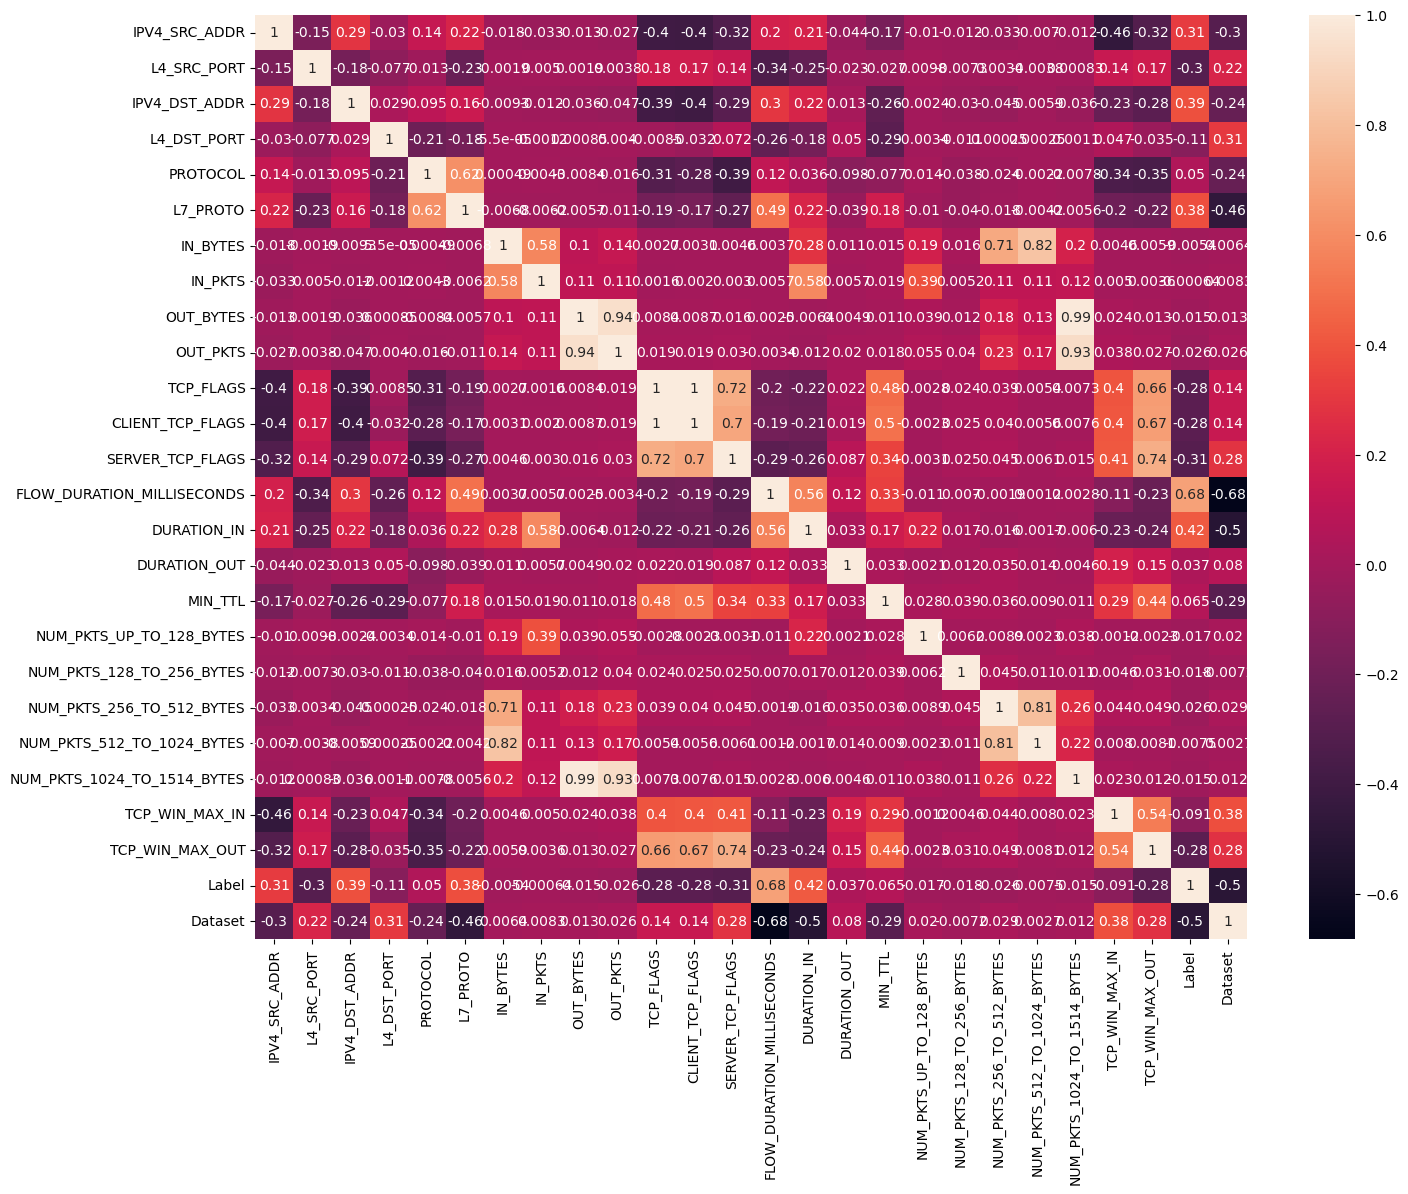

In [30]:
import seaborn as sns
data_corr = data.select_dtypes(include='number').columns
corr = data[data_corr].corr()
corr
plt.subplots(figsize=(16,12))
sns.heatmap(corr,annot=True)

## Dependent Variable Analysis

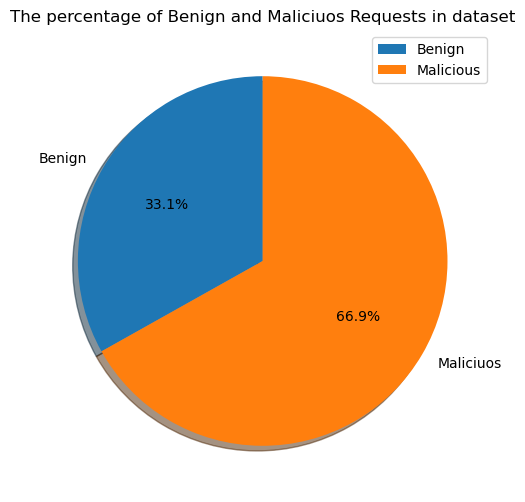

In [31]:
labels = ['Benign','Maliciuos']
sizes = [dict(data.Label.value_counts())[0], dict(data.Label.value_counts())[1]]
plt.figure(figsize = (6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Benign","Malicious"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()

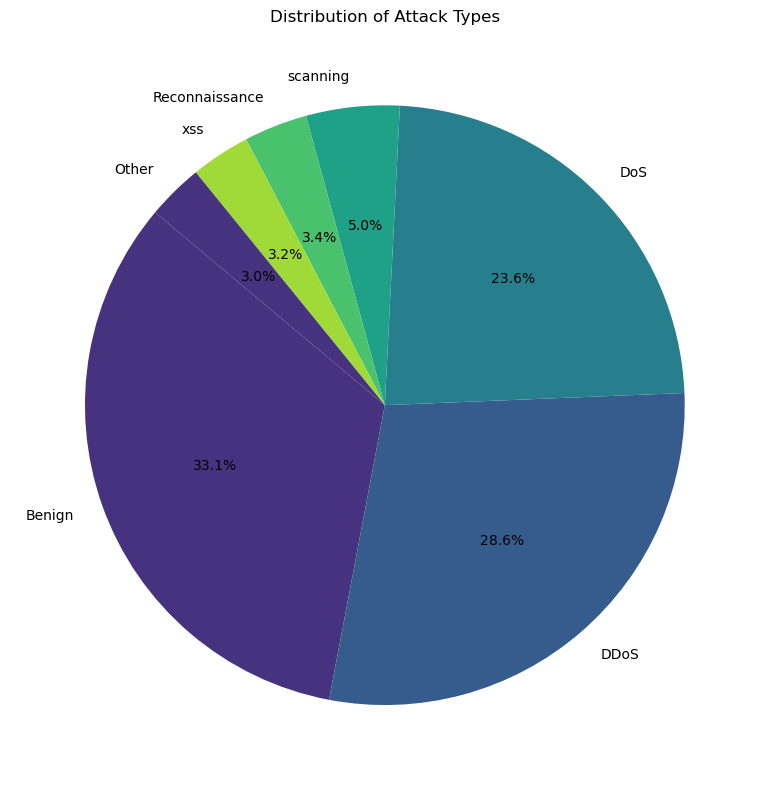

In [32]:
# Calculate the value counts for each attack type
value_counts = data['Attack'].value_counts()

# Set a threshold for the number of attack types to display
threshold = 6
top_attack_types = value_counts[:threshold]
other_attack_types = value_counts[threshold:]
other_sum = other_attack_types.sum()

# Combine top attack types and "Other" category
plot_data = pd.concat([top_attack_types, pd.Series([other_sum], index=['Other'])])

# Set the figure size
plt.figure(figsize=(8,8))

# Create a pie chart using Seaborn
sns.set_palette("viridis")
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title("Distribution of Attack Types")

# Show the plot
plt.tight_layout()
plt.show()

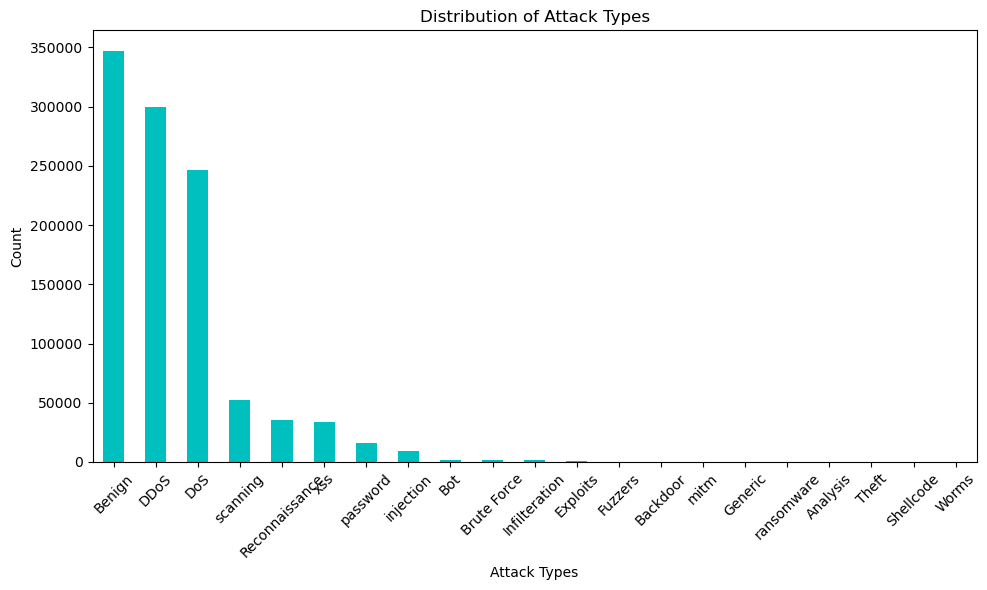

In [33]:
# Sample data with the "Attack_Type" column
bar_graph =data['Attack']
df = pd.DataFrame(bar_graph)

# Calculate the value counts for each attack type
value_counts = df['Attack'].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='c')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Plotting Boxplots for all numerical attributes.

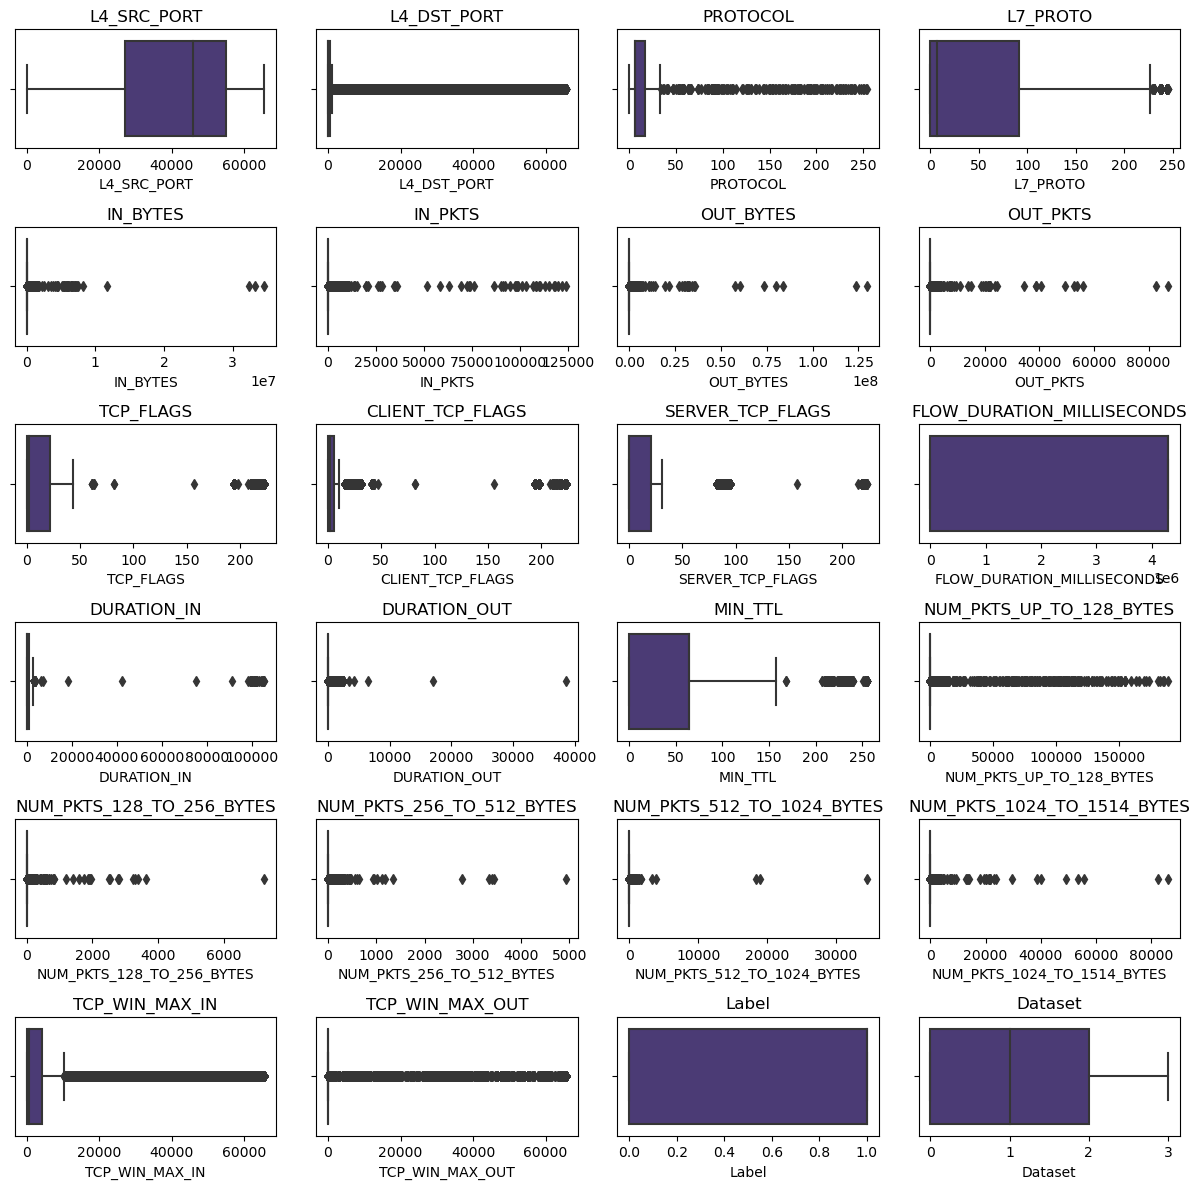

In [34]:
box_plot = ['L4_SRC_PORT', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'Label', 'Dataset']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(12, 12))

# Plot each boxplot on a separate subplot
for ax, column in zip(axes.flatten(), box_plot):
    sns.boxplot(data=data, x=column, ax=ax)
    ax.set_title(column)
    
    
plt.tight_layout()
plt.show()

## Removing Outliers

In [35]:
data['L4_DST_PORT'].describe()

count    1.047446e+06
mean     3.359738e+03
std      1.070433e+04
min      0.000000e+00
25%      8.000000e+01
50%      8.000000e+01
75%      4.430000e+02
max      6.553500e+04
Name: L4_DST_PORT, dtype: float64

In [36]:

## finding the IQR
percentile25=data['L4_DST_PORT'].quantile(0.25)
percentile75=data['L4_DST_PORT'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['L4_DST_PORT']> upper_limit]
data[data['L4_DST_PORT']<lower_limit]

## capping)

new_data=data.copy()
new_data['L4_DST_PORT']=np.where(
    new_data['L4_DST_PORT']> upper_limit,
    upper_limit,
    np.where(
        new_data['L4_DST_PORT']< lower_limit,
        lower_limit,
        new_data['L4_DST_PORT']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 987.5
lower limit -464.5


(1047446, 27)

/tmp/ipykernel_10524/1101302851.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['L4_DST_PORT'])
/tmp/ipykernel_10524/1101302851.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['L4_DST_PORT'])


<Axes: >

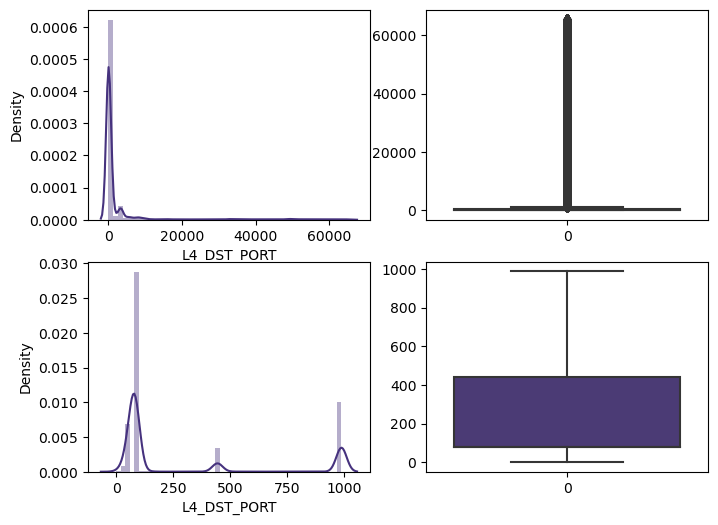

In [37]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['L4_DST_PORT'])

plt.subplot(2,2,2)
sns.boxplot(data['L4_DST_PORT'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['L4_DST_PORT'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['L4_DST_PORT'])

In [38]:
data['PROTOCOL'].describe()

count    1.047446e+06
mean     1.023064e+01
std      5.661573e+00
min      0.000000e+00
25%      6.000000e+00
50%      6.000000e+00
75%      1.700000e+01
max      2.540000e+02
Name: PROTOCOL, dtype: float64

In [39]:

## finding the IQR
percentile25=data['PROTOCOL'].quantile(0.25)
percentile75=data['PROTOCOL'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['PROTOCOL']> upper_limit]
data[data['PROTOCOL']<lower_limit]

## capping)

new_data['PROTOCOL']=np.where(
    new_data['PROTOCOL']> upper_limit,
    upper_limit,
    np.where(
        new_data['PROTOCOL']< lower_limit,
        lower_limit,
        new_data['PROTOCOL']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 33.5
lower limit -10.5


(1047446, 27)

/tmp/ipykernel_10524/2591508614.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PROTOCOL'])
/tmp/ipykernel_10524/2591508614.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['PROTOCOL'])


<Axes: >

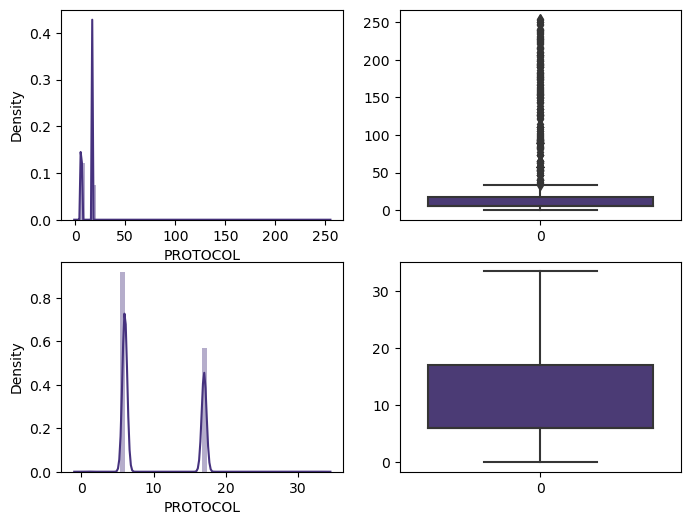

In [40]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['PROTOCOL'])

plt.subplot(2,2,2)
sns.boxplot(data['PROTOCOL'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['PROTOCOL'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['PROTOCOL'])

In [41]:
data['IN_BYTES'].describe()

count    1.047446e+06
mean     9.496893e+02
std      6.766442e+04
min      3.000000e+00
25%      5.600000e+01
50%      1.120000e+02
75%      2.800000e+02
max      3.464156e+07
Name: IN_BYTES, dtype: float64

In [42]:

## finding the IQR
percentile25=data['IN_BYTES'].quantile(0.25)
percentile75=data['IN_BYTES'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['IN_BYTES']> upper_limit]
data[data['IN_BYTES']<lower_limit]

## capping)

new_data['IN_BYTES']=np.where(
    new_data['IN_BYTES']> upper_limit,
    upper_limit,
    np.where(
        new_data['IN_BYTES']< lower_limit,
        lower_limit,
        new_data['IN_BYTES']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 616.0
lower limit -280.0


(1047446, 27)

/tmp/ipykernel_10524/1488748739.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['IN_BYTES'])
/tmp/ipykernel_10524/1488748739.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['IN_BYTES'])


<Axes: >

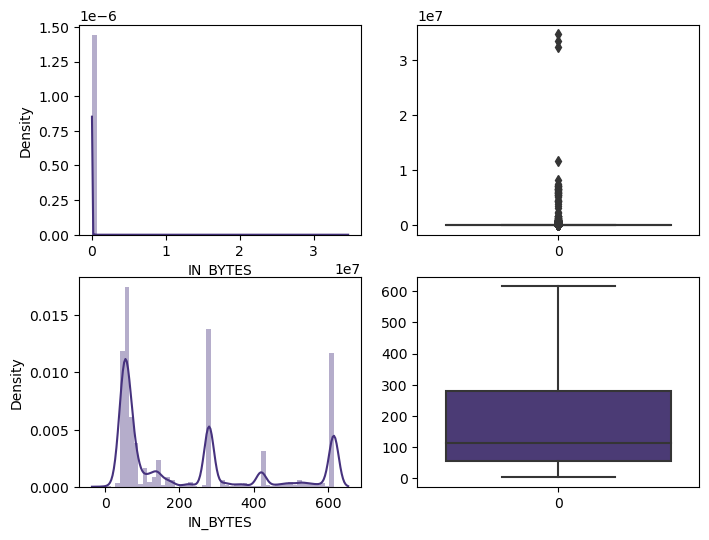

In [43]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['IN_BYTES'])

plt.subplot(2,2,2)
sns.boxplot(data['IN_BYTES'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['IN_BYTES'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['IN_BYTES'])

In [44]:
data['IN_PKTS'].describe()

count    1.047446e+06
mean     9.332782e+00
std      5.459986e+02
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.237630e+05
Name: IN_PKTS, dtype: float64

In [45]:

## finding the IQR
percentile25=data['IN_PKTS'].quantile(0.25)
percentile75=data['IN_PKTS'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['IN_PKTS']> upper_limit]
data[data['IN_PKTS']<lower_limit]

## capping)

new_data['IN_PKTS']=np.where(
    new_data['IN_PKTS']> upper_limit,
    upper_limit,
    np.where(
        new_data['IN_PKTS']< lower_limit,
        lower_limit,
        new_data['IN_PKTS']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 6.0
lower limit -2.0


(1047446, 27)

/tmp/ipykernel_10524/998341693.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['IN_PKTS'])
/tmp/ipykernel_10524/998341693.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['IN_PKTS'])


<Axes: >

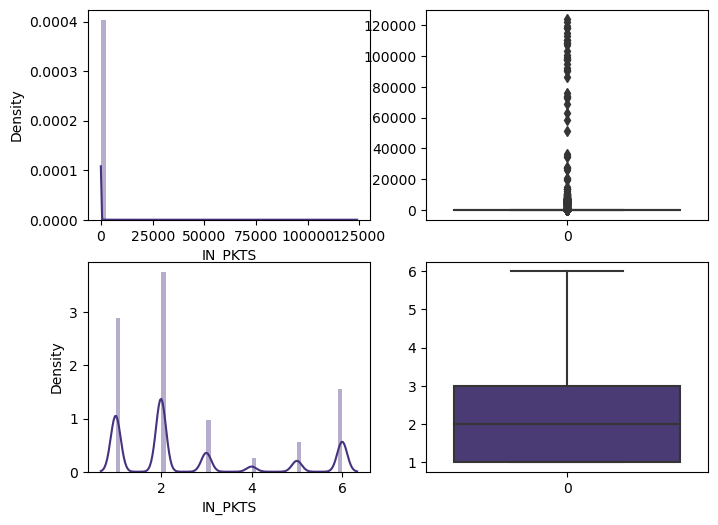

In [46]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['IN_PKTS'])

plt.subplot(2,2,2)
sns.boxplot(data['IN_PKTS'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['IN_PKTS'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['IN_PKTS'])

In [47]:
data['OUT_BYTES'].describe()

count    1.047446e+06
mean     3.178040e+03
std      2.666119e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.520000e+02
max      1.295737e+08
Name: OUT_BYTES, dtype: float64

In [48]:

## finding the IQR
percentile25=data['OUT_BYTES'].quantile(0.25)
percentile75=data['OUT_BYTES'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['OUT_BYTES']> upper_limit]
data[data['OUT_BYTES']<lower_limit]

## capping)

new_data['OUT_BYTES']=np.where(
    new_data['OUT_BYTES']>upper_limit,
    upper_limit,
    np.where(
        new_data['OUT_BYTES']< lower_limit,
        lower_limit,
        new_data['OUT_BYTES']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 380.0
lower limit -228.0


(1047446, 27)

/tmp/ipykernel_10524/3888608830.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['OUT_BYTES'])
/tmp/ipykernel_10524/3888608830.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['OUT_BYTES'])


<Axes: >

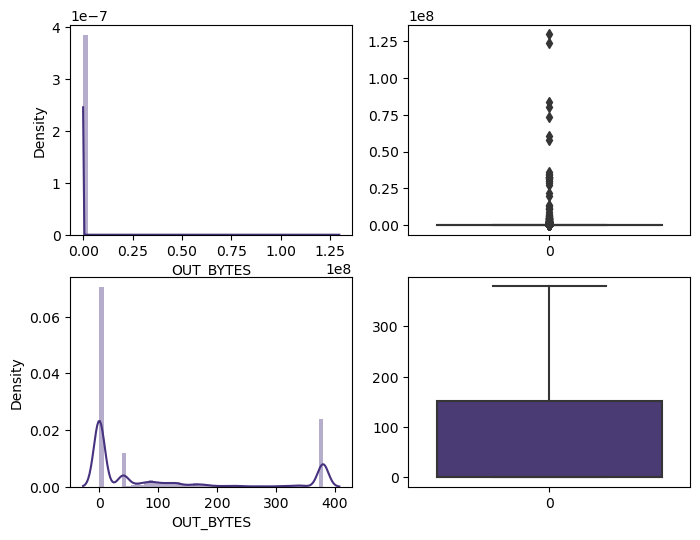

In [49]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['OUT_BYTES'])

plt.subplot(2,2,2)
sns.boxplot(data['OUT_BYTES'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['OUT_BYTES'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['OUT_BYTES'])

In [50]:
data['OUT_PKTS'].describe()

count    1.047446e+06
mean     4.739508e+00
std      1.930083e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      8.717900e+04
Name: OUT_PKTS, dtype: float64

In [51]:

## finding the IQR
percentile25=data['OUT_PKTS'].quantile(0.25)
percentile75=data['OUT_PKTS'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['OUT_PKTS']> upper_limit]
data[data['OUT_PKTS']<lower_limit]

## capping)

new_data['OUT_PKTS']=np.where(
    new_data['OUT_PKTS']>upper_limit,
    upper_limit,
    np.where(
        new_data['OUT_PKTS']< lower_limit,
        lower_limit,
        new_data['OUT_PKTS']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 2.5
lower limit -1.5


(1047446, 27)

/tmp/ipykernel_10524/2824310142.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['OUT_PKTS'])
/tmp/ipykernel_10524/2824310142.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['OUT_PKTS'])


<Axes: >

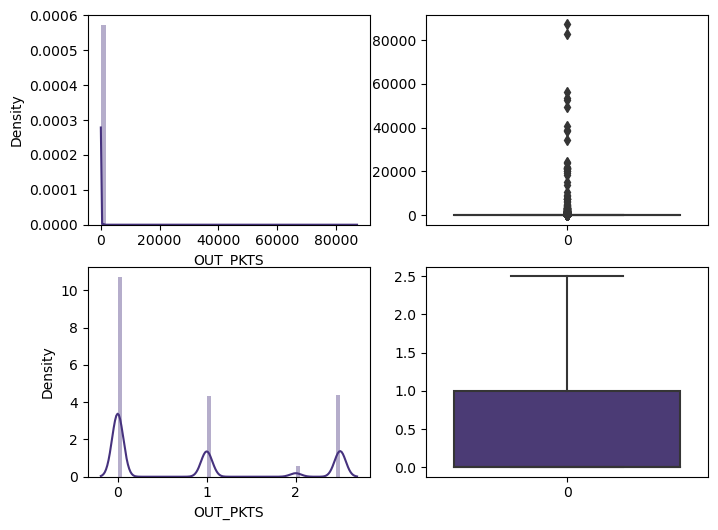

In [52]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['OUT_PKTS'])

plt.subplot(2,2,2)
sns.boxplot(data['OUT_PKTS'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['OUT_PKTS'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['OUT_PKTS'])

In [53]:
data['CLIENT_TCP_FLAGS'].describe()


count    1.047446e+06
mean     2.219677e+01
std      5.853310e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      6.000000e+00
max      2.230000e+02
Name: CLIENT_TCP_FLAGS, dtype: float64

In [54]:

## finding the IQR
percentile25=data['CLIENT_TCP_FLAGS'].quantile(0.25)
percentile75=data['CLIENT_TCP_FLAGS'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1


print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['CLIENT_TCP_FLAGS']> upper_limit]
data[data['CLIENT_TCP_FLAGS']<lower_limit]

## capping)

new_data['CLIENT_TCP_FLAGS']=np.where(
    new_data['CLIENT_TCP_FLAGS']>upper_limit,
    upper_limit,
    np.where(
        new_data['CLIENT_TCP_FLAGS']< lower_limit,
        lower_limit,
        new_data['CLIENT_TCP_FLAGS']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 15.0
lower limit -9.0


(1047446, 27)

/tmp/ipykernel_10524/2037774567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CLIENT_TCP_FLAGS'])
/tmp/ipykernel_10524/2037774567.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['CLIENT_TCP_FLAGS'])


<Axes: >

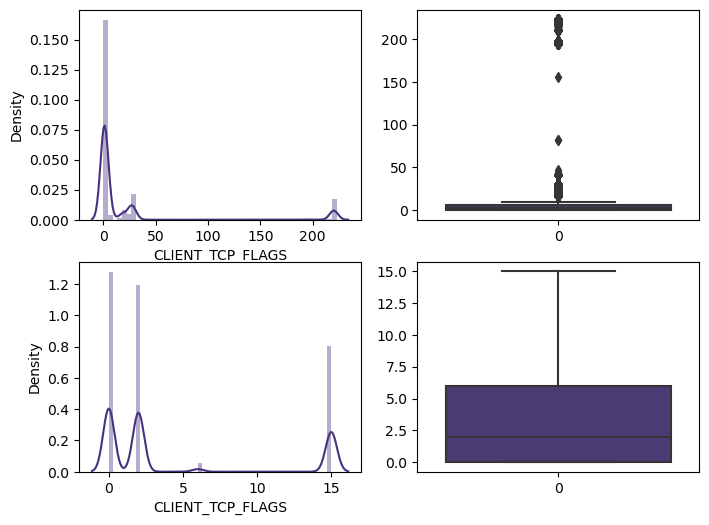

In [55]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['CLIENT_TCP_FLAGS'])

plt.subplot(2,2,2)
sns.boxplot(data['CLIENT_TCP_FLAGS'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['CLIENT_TCP_FLAGS'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['CLIENT_TCP_FLAGS'])

In [56]:
data['DURATION_IN'].describe()

count    1.047446e+06
mean     5.342418e+02
std      8.777824e+02
min      0.000000e+00
25%      0.000000e+00
50%      2.200000e+01
75%      1.047000e+03
max      1.054000e+05
Name: DURATION_IN, dtype: float64

In [57]:

## finding the IQR
percentile25=data['DURATION_IN'].quantile(0.25)
percentile75=data['DURATION_IN'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['DURATION_IN']> upper_limit]
data[data['DURATION_IN']<lower_limit]

## capping)

new_data['DURATION_IN']=np.where(
    new_data['DURATION_IN']>upper_limit,
    upper_limit,
    np.where(
        new_data['DURATION_IN']< lower_limit,
        lower_limit,
        new_data['DURATION_IN']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 2617.5
lower limit -1570.5


(1047446, 27)

/tmp/ipykernel_10524/1839973183.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['DURATION_IN'])
/tmp/ipykernel_10524/1839973183.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['DURATION_IN'])


<Axes: >

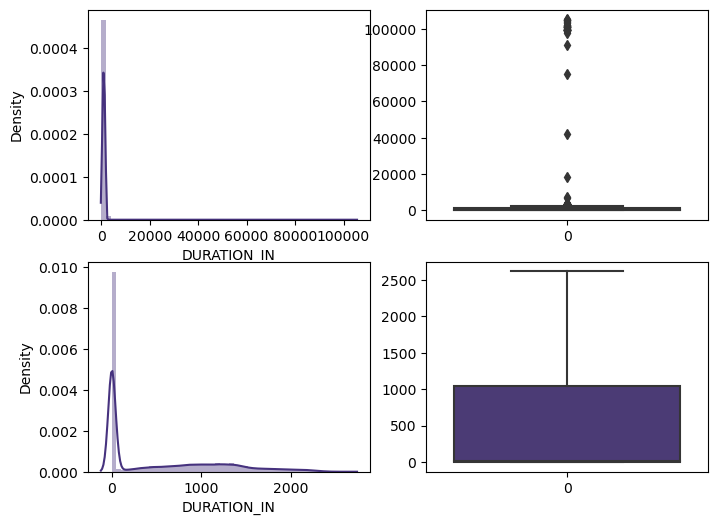

In [58]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['DURATION_IN'])

plt.subplot(2,2,2)
sns.boxplot(data['DURATION_IN'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['DURATION_IN'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['DURATION_IN'])

In [59]:
data['DURATION_OUT'].describe()

count    1.047446e+06
mean     1.496170e+01
std      1.133114e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.854700e+04
Name: DURATION_OUT, dtype: float64

In [60]:

## finding the IQR
percentile25=data['DURATION_OUT'].quantile(0.25)
percentile75=data['DURATION_OUT'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['DURATION_OUT']> upper_limit]
data[data['DURATION_OUT']<lower_limit]

## capping)

new_data['DURATION_OUT']=np.where(
    new_data['DURATION_OUT']>upper_limit,
    upper_limit,
    np.where(
        new_data['DURATION_OUT']< lower_limit,
        lower_limit,
        new_data['DURATION_OUT']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 0.0
lower limit 0.0


(1047446, 27)

/tmp/ipykernel_10524/3340751331.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['DURATION_OUT'])
/tmp/ipykernel_10524/3340751331.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['DURATION_OUT'])
/home/dbda2/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2511

<Axes: >

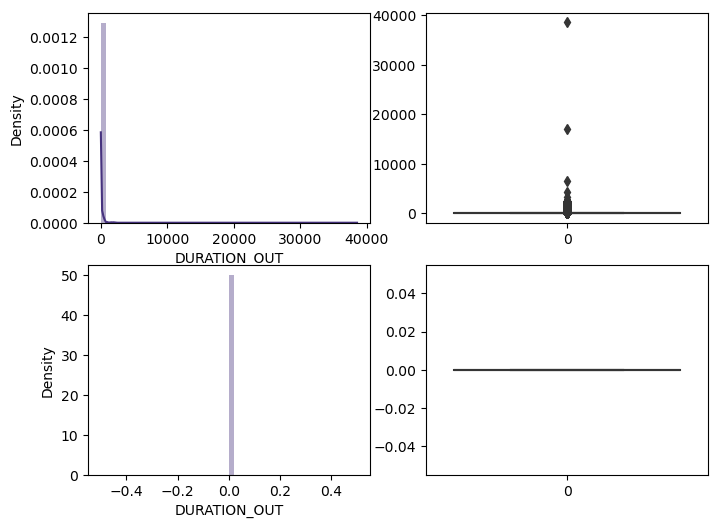

In [61]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['DURATION_OUT'])

plt.subplot(2,2,2)
sns.boxplot(data['DURATION_OUT'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['DURATION_OUT'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['DURATION_OUT'])

In [62]:
data['NUM_PKTS_UP_TO_128_BYTES'].describe()

count    1.047446e+06
mean     2.570399e+01
std      1.401764e+03
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      1.893700e+05
Name: NUM_PKTS_UP_TO_128_BYTES, dtype: float64

In [63]:

## finding the IQR
percentile25=data['NUM_PKTS_UP_TO_128_BYTES'].quantile(0.25)
percentile75=data['NUM_PKTS_UP_TO_128_BYTES'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['NUM_PKTS_UP_TO_128_BYTES']> upper_limit]
data[data['NUM_PKTS_UP_TO_128_BYTES']<lower_limit]

## capping)

new_data['NUM_PKTS_UP_TO_128_BYTES']=np.where(
    new_data['NUM_PKTS_UP_TO_128_BYTES']>upper_limit,
    upper_limit,
    np.where(
        new_data['NUM_PKTS_UP_TO_128_BYTES']< lower_limit,
        lower_limit,
        new_data['NUM_PKTS_UP_TO_128_BYTES']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 8.5
lower limit -3.5


(1047446, 27)

/tmp/ipykernel_10524/2595431163.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['NUM_PKTS_UP_TO_128_BYTES'])
/tmp/ipykernel_10524/2595431163.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['NUM_PKTS_UP_TO_128_BYTES'])


<Axes: >

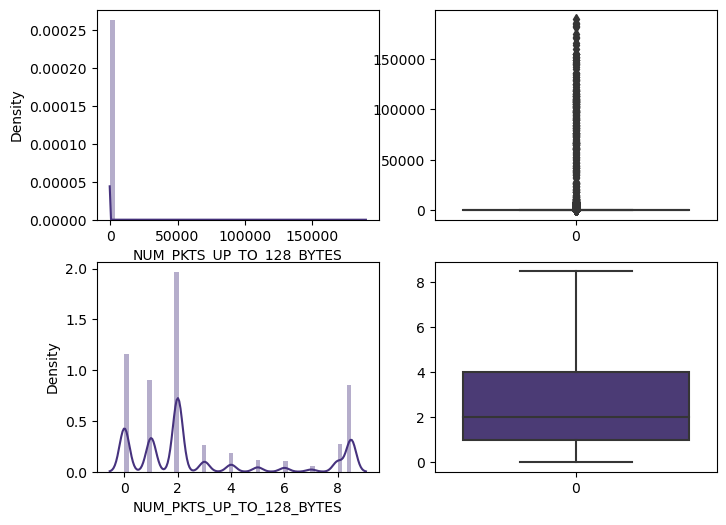

In [64]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['NUM_PKTS_UP_TO_128_BYTES'])

plt.subplot(2,2,2)
sns.boxplot(data['NUM_PKTS_UP_TO_128_BYTES'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['NUM_PKTS_UP_TO_128_BYTES'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['NUM_PKTS_UP_TO_128_BYTES'])

In [65]:
data['NUM_PKTS_128_TO_256_BYTES'].describe()

count    1.047446e+06
mean     9.645977e-01
std      1.255122e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      7.230000e+03
Name: NUM_PKTS_128_TO_256_BYTES, dtype: float64

In [66]:

## finding the IQR
percentile25=data['NUM_PKTS_128_TO_256_BYTES'].quantile(0.25)
percentile75=data['NUM_PKTS_128_TO_256_BYTES'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['NUM_PKTS_128_TO_256_BYTES']> upper_limit]
data[data['NUM_PKTS_128_TO_256_BYTES']<lower_limit]

## capping)

new_data['NUM_PKTS_128_TO_256_BYTES']=np.where(
    new_data['NUM_PKTS_128_TO_256_BYTES']>upper_limit,
    upper_limit,
    np.where(
        new_data['NUM_PKTS_128_TO_256_BYTES']< lower_limit,
        lower_limit,
        new_data['NUM_PKTS_128_TO_256_BYTES']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 5.0
lower limit -3.0


(1047446, 27)

/tmp/ipykernel_10524/3565421806.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['NUM_PKTS_128_TO_256_BYTES'])
/tmp/ipykernel_10524/3565421806.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['NUM_PKTS_128_TO_256_BYTES'])


<Axes: >

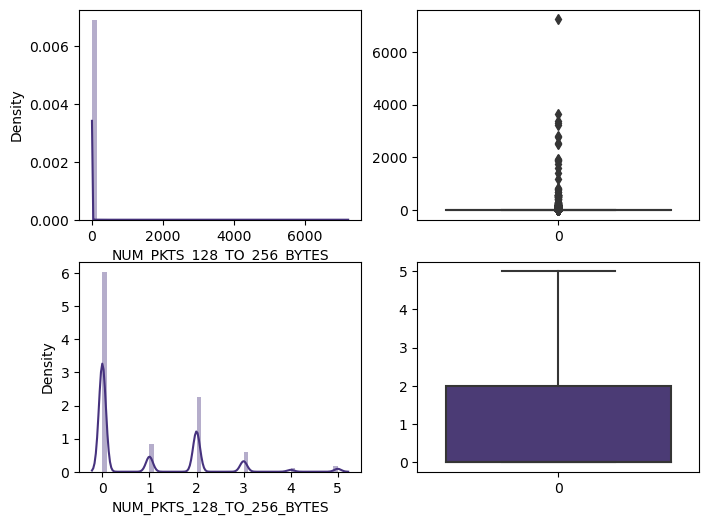

In [67]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['NUM_PKTS_128_TO_256_BYTES'])

plt.subplot(2,2,2)
sns.boxplot(data['NUM_PKTS_128_TO_256_BYTES'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['NUM_PKTS_128_TO_256_BYTES'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['NUM_PKTS_128_TO_256_BYTES'])

In [68]:
data['NUM_PKTS_256_TO_512_BYTES'].describe()

count    1.047446e+06
mean     3.465544e-01
std      8.929612e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.921000e+03
Name: NUM_PKTS_256_TO_512_BYTES, dtype: float64

In [69]:

## finding the IQR
percentile25=data['NUM_PKTS_256_TO_512_BYTES'].quantile(0.25)
percentile75=data['NUM_PKTS_256_TO_512_BYTES'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['NUM_PKTS_256_TO_512_BYTES']> upper_limit]
data[data['NUM_PKTS_256_TO_512_BYTES']<lower_limit]

## capping)

new_data['NUM_PKTS_256_TO_512_BYTES']=np.where(
    new_data['NUM_PKTS_256_TO_512_BYTES']>upper_limit,
    upper_limit,
    np.where(
        new_data['NUM_PKTS_256_TO_512_BYTES']< lower_limit,
        lower_limit,
        new_data['NUM_PKTS_256_TO_512_BYTES']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 0.0
lower limit 0.0


(1047446, 27)

/tmp/ipykernel_10524/1135231193.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['NUM_PKTS_256_TO_512_BYTES'])
/tmp/ipykernel_10524/1135231193.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['NUM_PKTS_256_TO_512_BYTES'])
/home/dbda2/miniconda3/lib/python3.9/site-packages/sea

<Axes: >

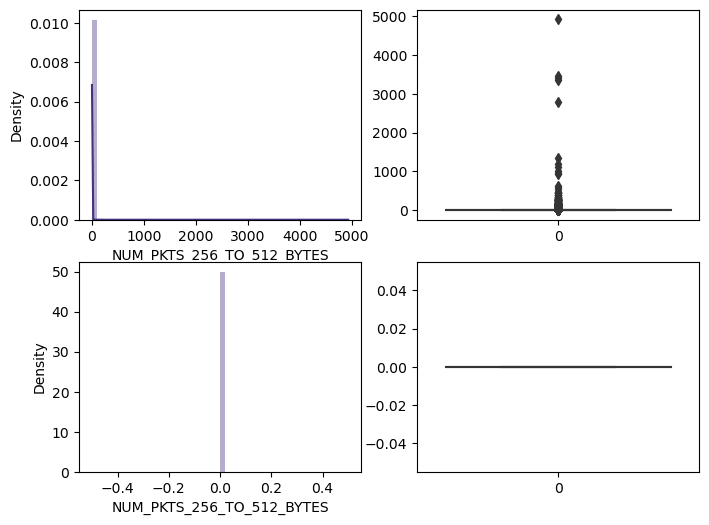

In [70]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['NUM_PKTS_256_TO_512_BYTES'])

plt.subplot(2,2,2)
sns.boxplot(data['NUM_PKTS_256_TO_512_BYTES'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['NUM_PKTS_256_TO_512_BYTES'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['NUM_PKTS_256_TO_512_BYTES'])

In [71]:
data['NUM_PKTS_512_TO_1024_BYTES'].describe()

count    1.047446e+06
mean     3.437934e-01
std      4.308390e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.444300e+04
Name: NUM_PKTS_512_TO_1024_BYTES, dtype: float64

In [72]:

## finding the IQR
percentile25=data['NUM_PKTS_512_TO_1024_BYTES'].quantile(0.25)
percentile75=data['NUM_PKTS_512_TO_1024_BYTES'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['NUM_PKTS_512_TO_1024_BYTES']> upper_limit]
data[data['NUM_PKTS_512_TO_1024_BYTES']<lower_limit]

## capping)

new_data['NUM_PKTS_512_TO_1024_BYTES']=np.where(
    new_data['NUM_PKTS_512_TO_1024_BYTES']>upper_limit,
    upper_limit,
    np.where(
        new_data['NUM_PKTS_512_TO_1024_BYTES']< lower_limit,
        lower_limit,
        new_data['NUM_PKTS_512_TO_1024_BYTES']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 0.0
lower limit 0.0


(1047446, 27)

/tmp/ipykernel_10524/1507714932.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['NUM_PKTS_512_TO_1024_BYTES'])
/tmp/ipykernel_10524/1507714932.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['NUM_PKTS_512_TO_1024_BYTES'])
/home/dbda2/miniconda3/lib/python3.9/site-packages/s

<Axes: >

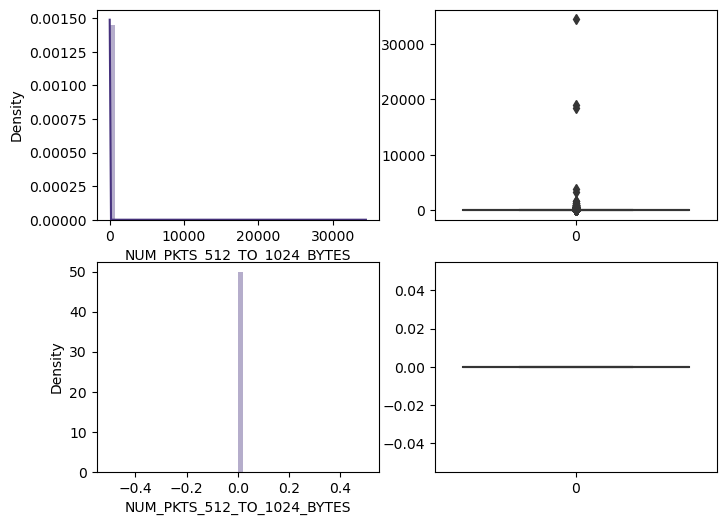

In [73]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['NUM_PKTS_512_TO_1024_BYTES'])

plt.subplot(2,2,2)
sns.boxplot(data['NUM_PKTS_512_TO_1024_BYTES'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['NUM_PKTS_512_TO_1024_BYTES'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['NUM_PKTS_512_TO_1024_BYTES'])

In [74]:
data['NUM_PKTS_1024_TO_1514_BYTES'].describe()

count    1.047446e+06
mean     2.062002e+00
std      1.794419e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.609600e+04
Name: NUM_PKTS_1024_TO_1514_BYTES, dtype: float64

In [75]:

## finding the IQR
percentile25=data['NUM_PKTS_1024_TO_1514_BYTES'].quantile(0.25)
percentile75=data['NUM_PKTS_1024_TO_1514_BYTES'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['NUM_PKTS_1024_TO_1514_BYTES']> upper_limit]
data[data['NUM_PKTS_1024_TO_1514_BYTES']<lower_limit]

## capping)

new_data['NUM_PKTS_1024_TO_1514_BYTES']=np.where(
    new_data['NUM_PKTS_1024_TO_1514_BYTES']>upper_limit,
    upper_limit,
    np.where(
        new_data['NUM_PKTS_1024_TO_1514_BYTES']< lower_limit,
        lower_limit,
        new_data['NUM_PKTS_1024_TO_1514_BYTES']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 0.0
lower limit 0.0


(1047446, 27)

/tmp/ipykernel_10524/2703040297.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['NUM_PKTS_1024_TO_1514_BYTES'])
/tmp/ipykernel_10524/2703040297.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['NUM_PKTS_1024_TO_1514_BYTES'])
/home/dbda2/miniconda3/lib/python3.9/site-packages

<Axes: >

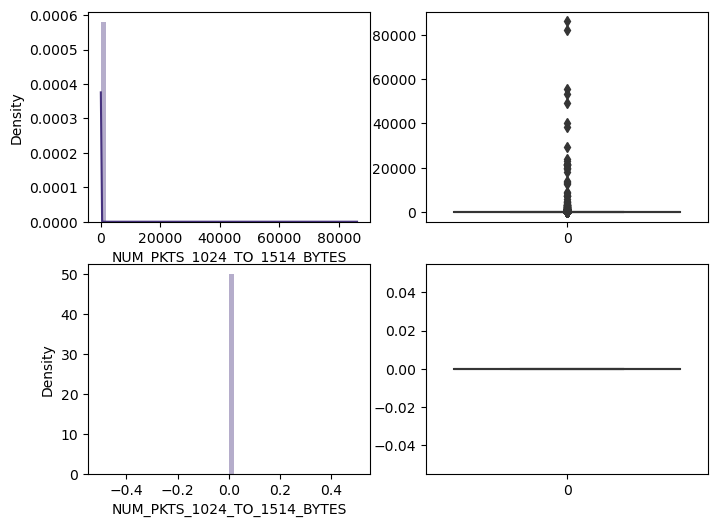

In [76]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['NUM_PKTS_1024_TO_1514_BYTES'])

plt.subplot(2,2,2)
sns.boxplot(data['NUM_PKTS_1024_TO_1514_BYTES'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['NUM_PKTS_1024_TO_1514_BYTES'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['NUM_PKTS_1024_TO_1514_BYTES'])

In [77]:
data['TCP_WIN_MAX_IN'].describe()


count    1.047446e+06
mean     6.028226e+03
std      1.324383e+04
min      0.000000e+00
25%      0.000000e+00
50%      5.120000e+02
75%      4.096000e+03
max      6.553500e+04
Name: TCP_WIN_MAX_IN, dtype: float64

In [78]:

## finding the IQR
percentile25=data['TCP_WIN_MAX_IN'].quantile(0.25)
percentile75=data['TCP_WIN_MAX_IN'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['TCP_WIN_MAX_IN']> upper_limit]
data[data['TCP_WIN_MAX_IN']<lower_limit]

## capping)

new_data['TCP_WIN_MAX_IN']=np.where(
    new_data['TCP_WIN_MAX_IN']>upper_limit,
    upper_limit,
    np.where(
        new_data['TCP_WIN_MAX_IN']< lower_limit,
        lower_limit,
        new_data['TCP_WIN_MAX_IN']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 10240.0
lower limit -6144.0


(1047446, 27)

/tmp/ipykernel_10524/52027024.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TCP_WIN_MAX_IN'])
/tmp/ipykernel_10524/52027024.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['TCP_WIN_MAX_IN'])


<Axes: >

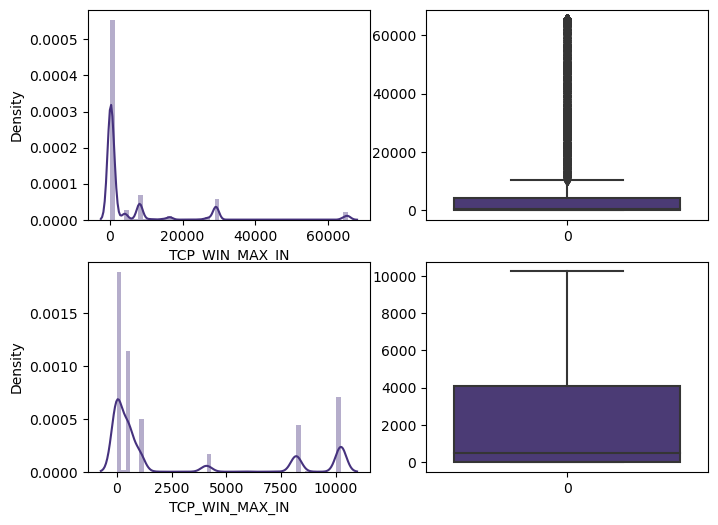

In [79]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['TCP_WIN_MAX_IN'])

plt.subplot(2,2,2)
sns.boxplot(data['TCP_WIN_MAX_IN'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['TCP_WIN_MAX_IN'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['TCP_WIN_MAX_IN'])

In [80]:
data['TCP_WIN_MAX_OUT'].describe()

count    1.047446e+06
mean     8.392073e+03
std      1.770659e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.553500e+04
Name: TCP_WIN_MAX_OUT, dtype: float64

In [81]:

## finding the IQR
percentile25=data['TCP_WIN_MAX_OUT'].quantile(0.25)
percentile75=data['TCP_WIN_MAX_OUT'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['TCP_WIN_MAX_OUT']> upper_limit]
data[data['TCP_WIN_MAX_OUT']<lower_limit]

## capping)

new_data['TCP_WIN_MAX_OUT']=np.where(
    new_data['TCP_WIN_MAX_OUT']>upper_limit,
    upper_limit,
    np.where(
        new_data['TCP_WIN_MAX_OUT']< lower_limit,
        lower_limit,
        new_data['TCP_WIN_MAX_OUT']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 0.0
lower limit 0.0


(1047446, 27)

/tmp/ipykernel_10524/625435241.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TCP_WIN_MAX_OUT'])
/tmp/ipykernel_10524/625435241.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['TCP_WIN_MAX_OUT'])
/home/dbda2/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:

<Axes: >

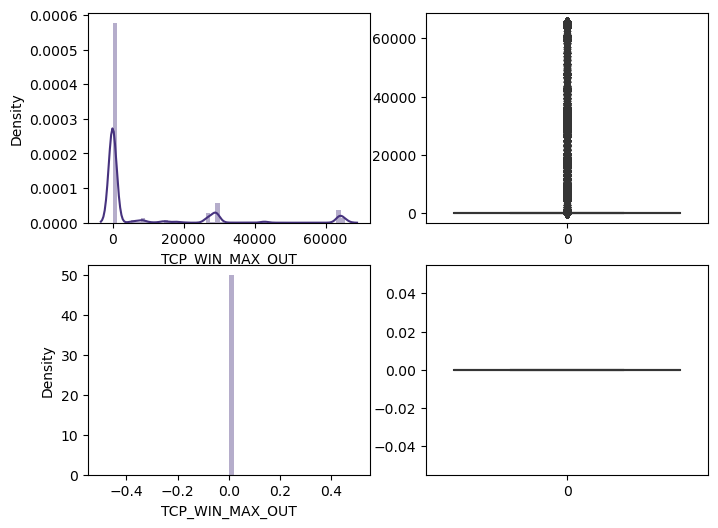

In [82]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['TCP_WIN_MAX_OUT'])

plt.subplot(2,2,2)
sns.boxplot(data['TCP_WIN_MAX_OUT'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['TCP_WIN_MAX_OUT'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['TCP_WIN_MAX_OUT'])

In [83]:
data['TCP_FLAGS'].describe()

count    1.047446e+06
mean     2.419878e+01
std      5.845629e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      2.200000e+01
max      2.230000e+02
Name: TCP_FLAGS, dtype: float64

In [84]:

## finding the IQR
percentile25=data['TCP_FLAGS'].quantile(0.25)
percentile75=data['TCP_FLAGS'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['TCP_FLAGS']> upper_limit]
data[data['TCP_FLAGS']<lower_limit]

## capping)

new_data['TCP_FLAGS']=np.where(
    new_data['TCP_FLAGS']>upper_limit,
    upper_limit,
    np.where(
        new_data['TCP_FLAGS']< lower_limit,
        lower_limit,
        new_data['TCP_FLAGS']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 55.0
lower limit -33.0


(1047446, 27)

/tmp/ipykernel_10524/1887542589.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TCP_FLAGS'])
/tmp/ipykernel_10524/1887542589.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['TCP_FLAGS'])


<Axes: >

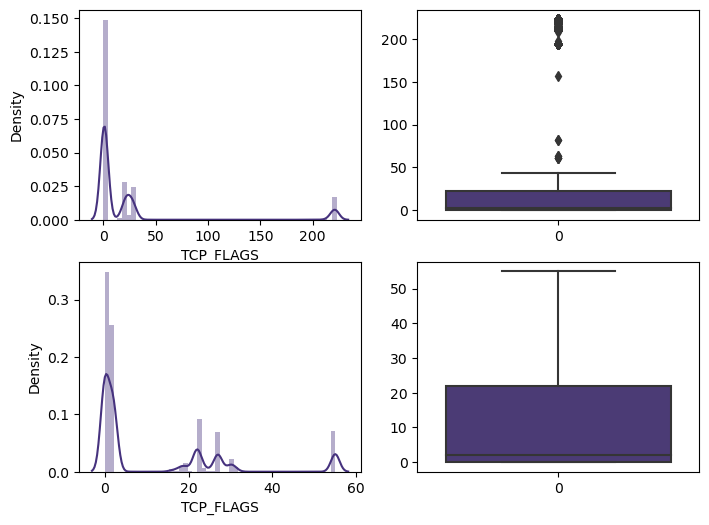

In [85]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['TCP_FLAGS'])

plt.subplot(2,2,2)
sns.boxplot(data['TCP_FLAGS'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['TCP_FLAGS'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['TCP_FLAGS'])

In [86]:
data['SERVER_TCP_FLAGS'].describe()

count    1.047446e+06
mean     9.531379e+00
std      1.805587e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+01
max      2.230000e+02
Name: SERVER_TCP_FLAGS, dtype: float64

In [87]:

## finding the IQR
percentile25=data['SERVER_TCP_FLAGS'].quantile(0.25)
percentile75=data['SERVER_TCP_FLAGS'].quantile(0.75)
iqr1=percentile75-percentile25

upper_limit=percentile75+1.5*iqr1
lower_limit=percentile25-1.5*iqr1

print('upper limit',upper_limit)
print('lower limit',lower_limit)

## finding outlier
data[data['SERVER_TCP_FLAGS']> upper_limit]
data[data['SERVER_TCP_FLAGS']<lower_limit]

## capping)

new_data['SERVER_TCP_FLAGS']=np.where(
    new_data['SERVER_TCP_FLAGS']>upper_limit,
    upper_limit,
    np.where(
        new_data['SERVER_TCP_FLAGS']< lower_limit,
        lower_limit,
        new_data['SERVER_TCP_FLAGS']
    )
)

#np.where(condition, true, false)
new_data.shape

upper limit 50.0
lower limit -30.0


(1047446, 27)

/tmp/ipykernel_10524/3285737526.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SERVER_TCP_FLAGS'])
/tmp/ipykernel_10524/3285737526.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['SERVER_TCP_FLAGS'])


<Axes: >

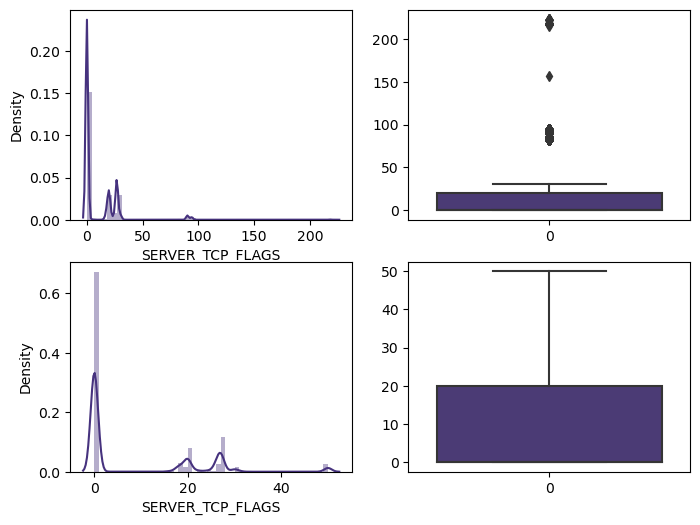

In [88]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(data['SERVER_TCP_FLAGS'])

plt.subplot(2,2,2)
sns.boxplot(data['SERVER_TCP_FLAGS'])
                 
plt.subplot(2,2,3)
sns.distplot(new_data['SERVER_TCP_FLAGS'])  

plt.subplot(2,2,4)
sns.boxplot(new_data['SERVER_TCP_FLAGS'])

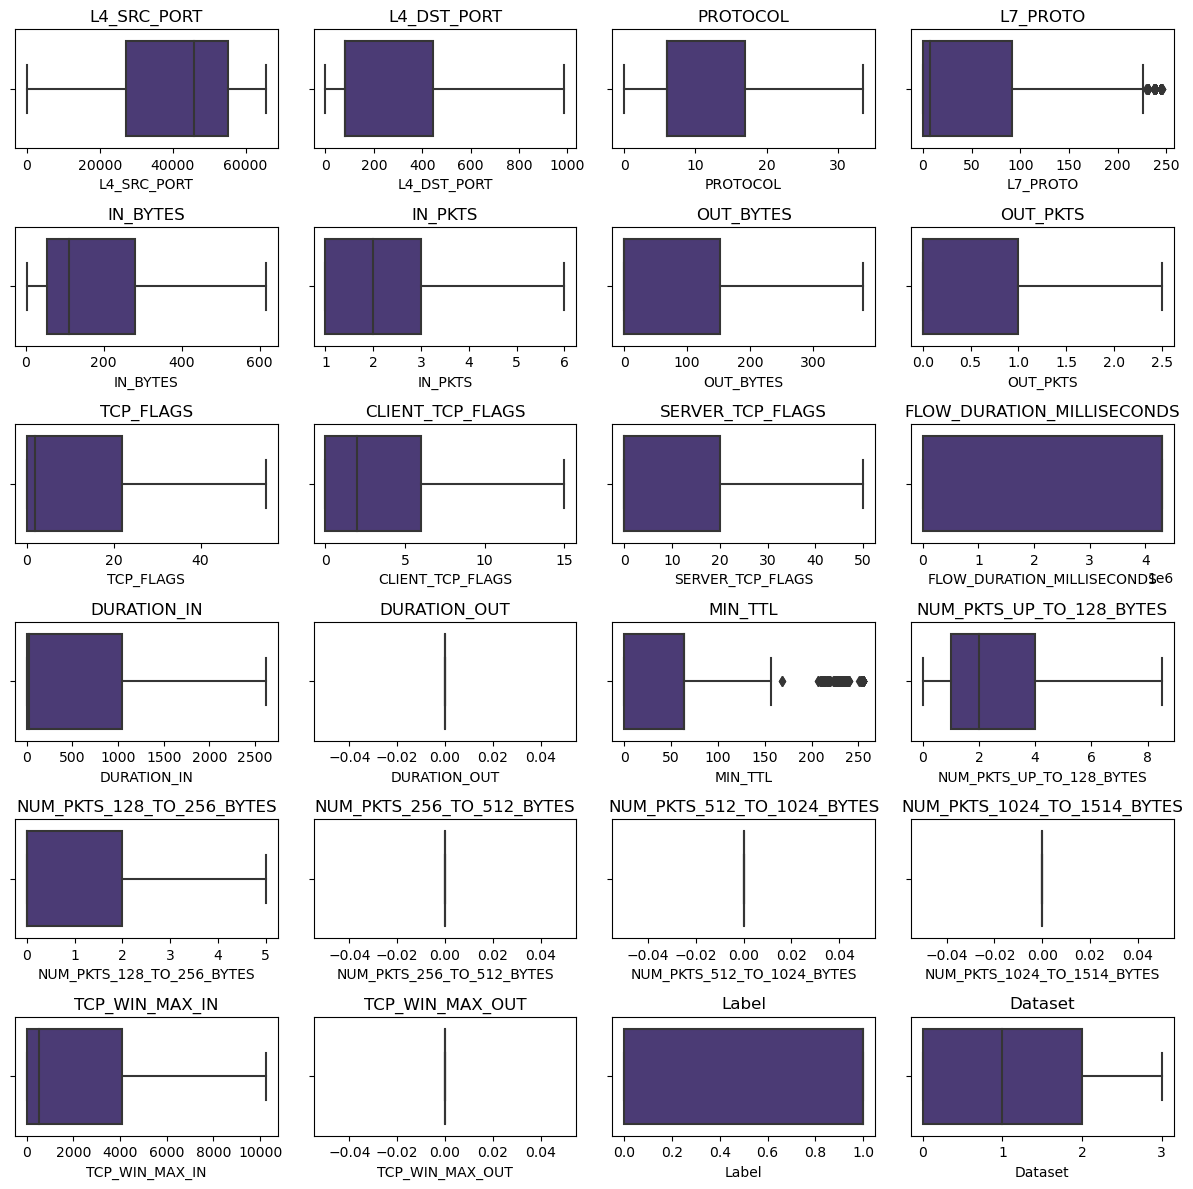

In [89]:
box_plot = ['L4_SRC_PORT', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'Label', 'Dataset']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(12, 12))

# Plot each boxplot on a separate subplot
for ax, column in zip(axes.flatten(), box_plot):
    sns.boxplot(data=new_data, x=column, ax=ax)
    ax.set_title(column)
    
    
plt.tight_layout()
plt.show()

## Bar graph for columns

In [90]:
#Visualization
def bar_graph(feature):
    data[feature].value_counts().plot(kind="bar")


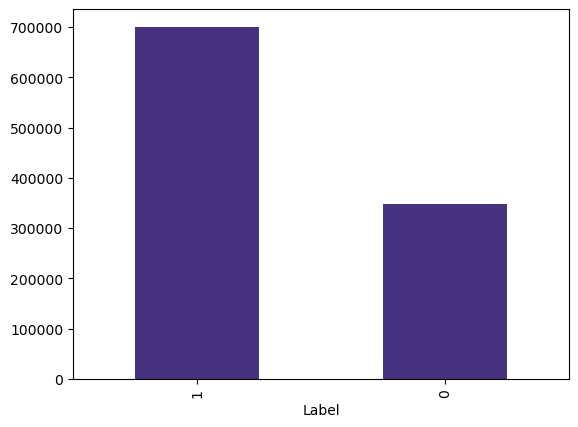

In [91]:
bar_graph('Label')

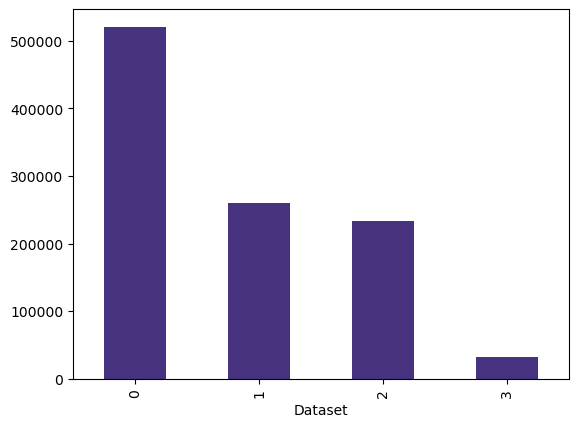

In [92]:
bar_graph('Dataset')

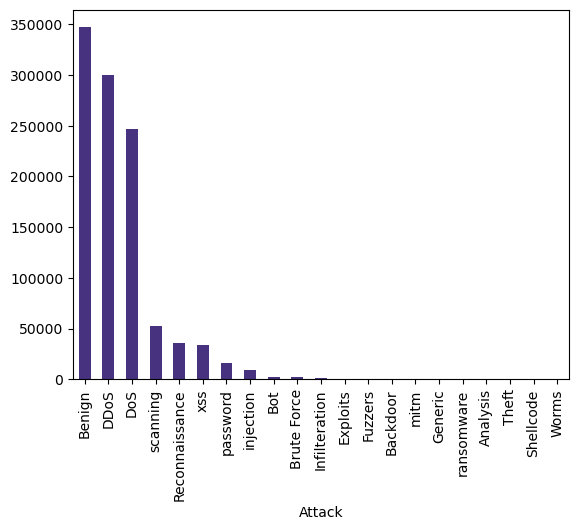

In [93]:
bar_graph('Attack')

## Distribution plots and Dispersion patterns

ValueError: num must be an integer with 1 <= num <= 9, not 10

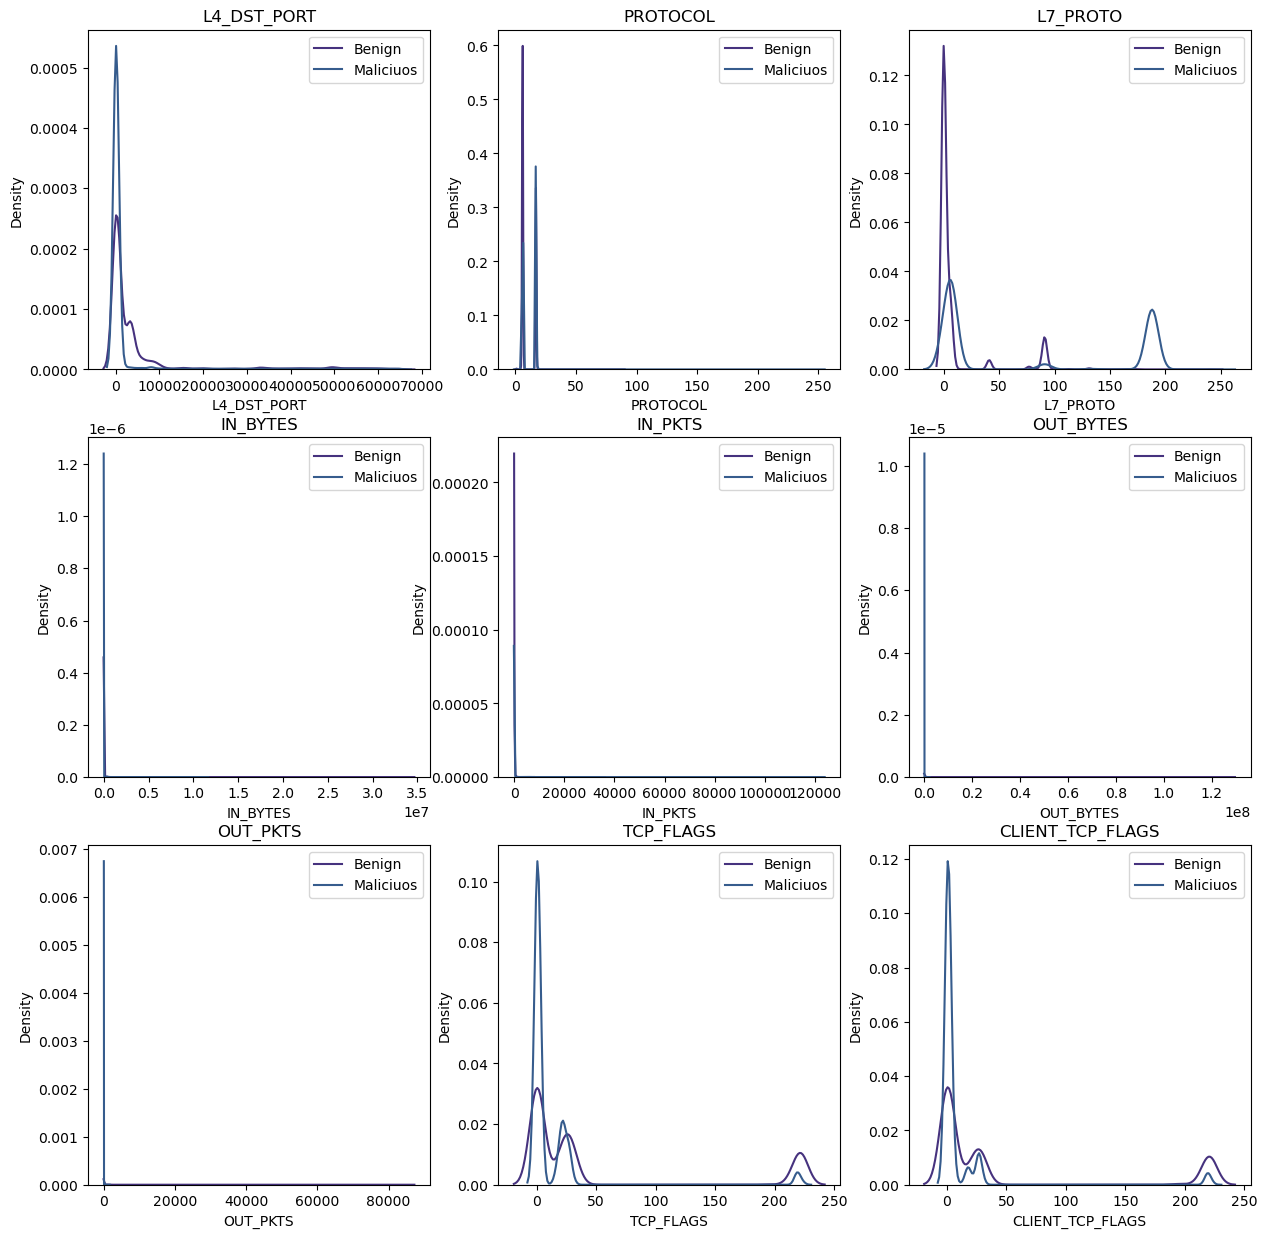

In [94]:
Genuine = data.query("Label == 0")
Maliciuos= data.query("Label == 1")

# Assuming df is your DataFrame
selected_columns = data.iloc[:, 3:25]  # Selects columns from start_index to end_index (exclusive)

plt.figure(figsize = (15,15))
for ax, col in enumerate(selected_columns):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = Genuine[col], label = "Benign")
    sns.kdeplot(x = Maliciuos[col], label ="Maliciuos")
    plt.legend()
plt.tight_layout()

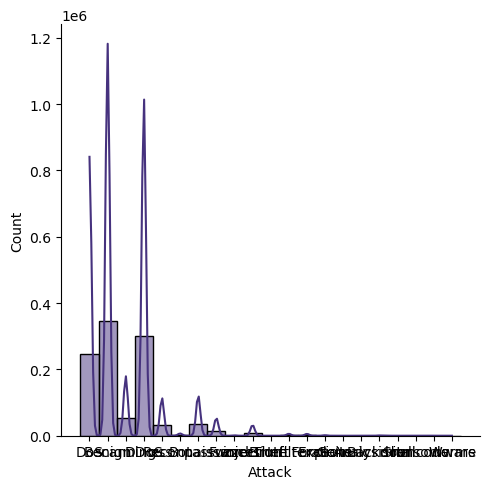

In [95]:
sns.displot(data=data, x='Attack', kde=True, multiple='layer')

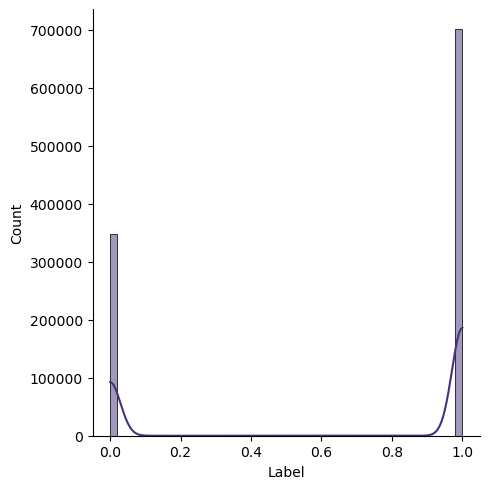

In [96]:
sns.displot(data=data, x='Label', kde=True, multiple='layer')

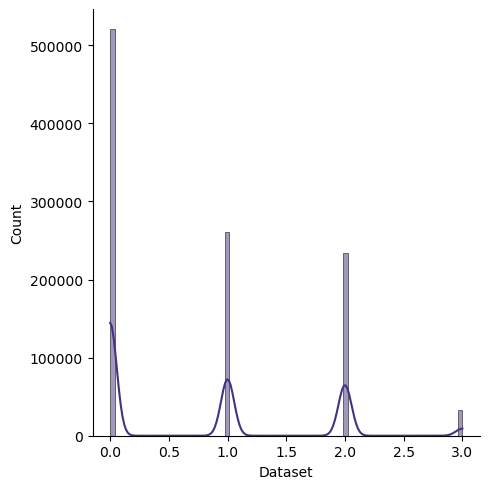

In [97]:
sns.displot(data=data, x='Dataset', kde=True, multiple='layer')

## Apply Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Training and Testing Data 

In [99]:
data.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'Label', 'Attack', 'Dataset'],
      dtype='object')

In [100]:
# Now that pre-processing is complete, split data into X_train, y_train, X_test, and y_t
# Separate the features (X) and the target variable (y)
X = new_data.drop(['Label','Attack'], axis=1)
y = new_data['Label']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verify the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (837956, 25)
y_train shape: (837956,)
X_test shape: (209490, 25)
y_test shape: (209490,)


In [101]:
rf_classifier = RandomForestClassifier()
# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)
# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate predicted probabilities for the positive class (class 1)
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of positive class



In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,r2_score

In [103]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.996887679602845
Precision: 0.9979378195305675
Recall: 0.9973950505961326
F1-score: 0.9976663612415531


## Evaluating the accuracy of model

In [104]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

### Confusion matrix

In [105]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 69468    288]
 [   364 139370]]


## ROC Curve and AUC

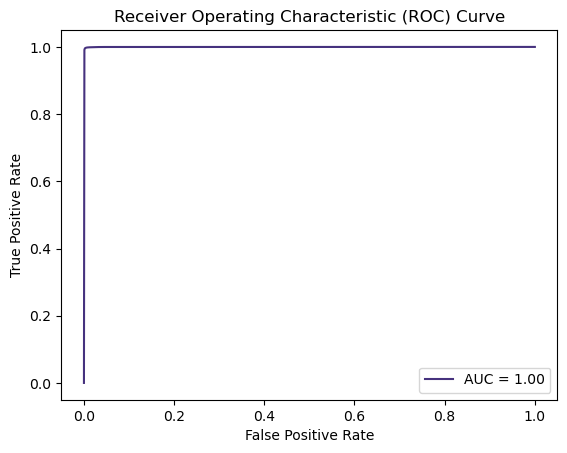

In [106]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Precision-Recall Curve

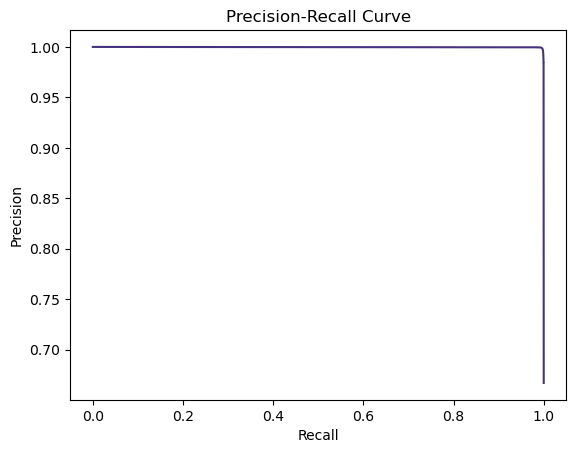

In [107]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# Under Sampling

In [108]:
y_train.value_counts()

Label
1    560664
0    277292
Name: count, dtype: int64

In [109]:
from collections import Counter 
from imblearn.under_sampling import NearMiss
ns = NearMiss(sampling_strategy=0.8)
x_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({1: 560664, 0: 277292})
The number of classes after fitCounter({1: 346615, 0: 277292})


In [110]:
0.8*347263

277810.4

In [111]:
# Classifier =RandomForestClassifier()
# Classifier.fitmin_samples_leaf

from sklearn.ensemble import RandomForestClassifier

# Creating a RandomForestClassifier with min_samples_leaf parameter
Classifier = RandomForestClassifier(min_samples_leaf=4)

# Fitting the classifier to your data
Classifier.fit(x_train_ns, y_train_ns)  


RandomForestClassifier(min_samples_leaf=4)

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred= Classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 69489    267]
 [  1556 138178]]
0.9912979139815743
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     69756
           1       1.00      0.99      0.99    139734

    accuracy                           0.99    209490
   macro avg       0.99      0.99      0.99    209490
weighted avg       0.99      0.99      0.99    209490



# Feature Importance

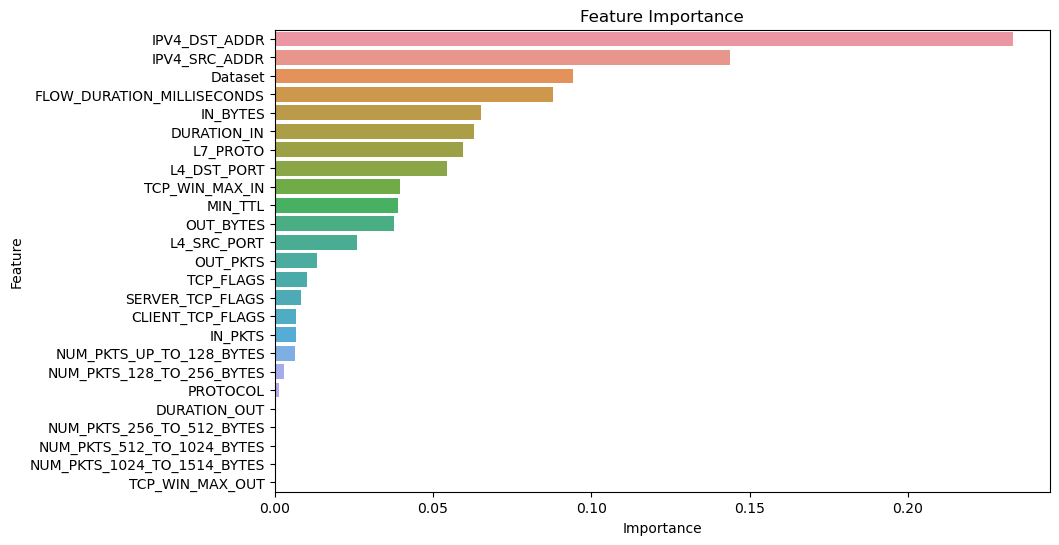

In [113]:
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


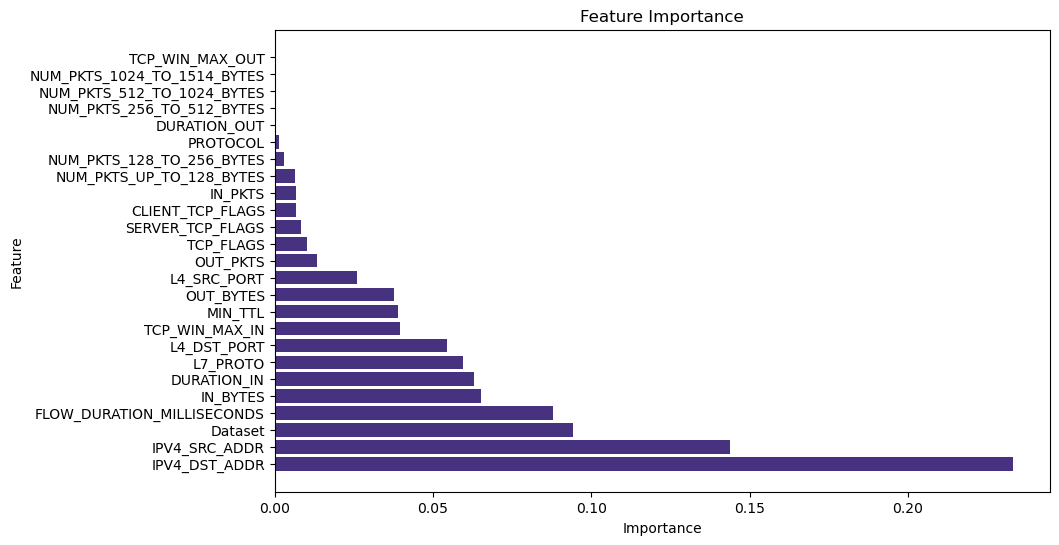

In [114]:

# Create a DataFrame to store feature importance values
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## cross validation like KFOLD and Hyperparameter Tuning

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
10.0 **np.arange(-2,3)

In [ ]:
log_class=LogisticRegression()
grid={'c':10.0 **np.arange(-2,3),'penalty':['11','12']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [ ]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train_ns,y_train_ns)

In [ ]:
y_pred=clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

## XGBOOST Algorithm

In [129]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/8c/3a/c9c5d4d5c49b132ef15ac7b5ccf56ef1c82efe36cd19414771762e97c00e/xgboost-1.7.6-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 2.9 MB/s eta 0:00:000m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [130]:

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    max_depth=6,                  # Adjust the maximum depth as needed
    n_estimators=100,             # Adjust the number of trees as needed
    learning_rate=0.1,            # Adjust the learning rate as needed
    random_state=42               # Set a random seed for reproducibility
)

# Train the model
model.fit(x_train_ns, y_train_ns)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# You can also print more detailed classification metrics
print(classification_report(y_test, y_pred))

Test Accuracy: 98.78%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     69756
           1       1.00      0.98      0.99    139734

    accuracy                           0.99    209490
   macro avg       0.98      0.99      0.99    209490
weighted avg       0.99      0.99      0.99    209490



### Logistic Regression

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('k-Nearest Neighbors', KNeighborsClassifier())
]

for name, clf in classifiers:
    clf.fit(x_train_ns, y_train_ns)  # Train the classifier
    y_pred = clf.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    confusion = confusion_matrix(y_test, y_pred)  # Confusion matrix

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("=" * 40)

Classifier: Logistic Regression
Accuracy: 0.8250
Confusion Matrix:
[[ 62387   7369]
 [ 29298 110436]]
Classifier: Decision Tree
Accuracy: 0.9840
Confusion Matrix:
[[ 69344    412]
 [  2940 136794]]
Classifier: Random Forest
Accuracy: 0.9906
Confusion Matrix:
[[ 69464    292]
 [  1685 138049]]


In [115]:
import pickle

# Save the trained Random Forest model to a file
with open('dos_detection_model.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)

In [125]:
# Load the trained Random Forest model from the pickle file
with open('dos_detection_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Now you can use loaded_model to make predictions on new data
new_data =pd.read_csv("updated_dataset.csv").drop(["Attack","Label"], axis=1) # Load or create new data for prediction
predictions = loaded_model.predict(new_data)

In [131]:
import pickle

# Save the trained XGBoost model to a file in binary mode
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)